<a href="https://colab.research.google.com/github/ferjozsot23/machine-learning/blob/main/SVM_Classifier_Regressor_and_Linear_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fernando José Soto Jácome

# Objetivos
1. Comprender de manera general cómo trabajan las máquinas de vectores de soporte y aplicarlo para resolver tareas de clasificación.
1. Aplicar SVM en un ejemplo de clasificación y mirar su costo computacional.
1. Comparar el desempeño de SVM Regressor y Regresión Lineal para una tarea de regresión

# Introducción
Una tarea de predicción de clasificación o de regresión permite estimar un resultado dependiendo de sus variables indpendientes. Es así como conocer, analizar y procesar las variables predictoras permiten que el modelo alcance una mayor precisión, independientemente de si se trata de variables categóricas o números reales de valor continuo.

Cuando se trata de predecir la categoría de una variable de criterio, se tiene varios métodos, uno de ellos es el de Support Vector Machines
(SVM) que se define mediante un hiperplano de separación entre las clases. Si la predicción se basa en una variable dependiente numérica, se puede utilizar Regresión Lineal, que estima la relación entre variables de entrada y de salida. Cuando no es suficiente el método lineal, se utiliza la Regresión Polinomial que proporciona una mayor precisión pero tiende a ser más complejo computacionalmente.

En este informe se tratará predicción de clasificación y regresión, por lo que las variables target serán diferentes en ambos casos para entender en mayor medida estos modelos de predicción.


# Ejercicios presentados

# Ejercicios Python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split, cross_val_score


# SUPPORT VECTOR MACHINES (SVM) para clasificación

In [ ]:
fly_df = pd.read_csv('Invistico_Airline.csv')
fly_df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
fly_df.dtypes

satisfaction                         object
Gender                               object
Customer Type                        object
Age                                   int64
Type of Travel                       object
Class                                object
Flight Distance                       int64
Seat comfort                          int64
Departure/Arrival time convenient     int64
Food and drink                        int64
Gate location                         int64
Inflight wifi service                 int64
Inflight entertainment                int64
Online support                        int64
Ease of Online booking                int64
On-board service                      int64
Leg room service                      int64
Baggage handling                      int64
Checkin service                       int64
Cleanliness                           int64
Online boarding                       int64
Departure Delay in Minutes            int64
dtype: object

In [ ]:
fly_df = np.array(fly_df)

In [ ]:
fly_df[0]

array(['satisfied', 'Female', 'Loyal Customer', 65, 'Personal Travel',
       'Eco', 265, 0, 0, 0, 2, 2, 4, 2, 3, 3, 0, 3, 5, 3, 2, 0],
      dtype=object)

In [ ]:
label_encoder = []
X_encoded = np.empty(fly_df.shape)

for i,item in enumerate(fly_df[0]):
    if str(item).isdigit():
        X_encoded[:, i] = fly_df[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(fly_df[:, i])
X = X_encoded[:, 1:].astype(int) #features
y = X_encoded[:, 0].astype(int)  # clase

In [ ]:
X[0]

array([  0,   0,  65,   1,   1, 265,   0,   0,   0,   2,   2,   4,   2,
         3,   3,   0,   3,   5,   3,   2,   0])

In [ ]:
label_encoder

[LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder()]

In [ ]:
y[0]

1

### Se importa time para calcular la duración de la ejecución y costo computacional

In [ ]:
import time

In [ ]:
classifier = OneVsOneClassifier(LinearSVC(random_state=0)) # max_iter=5000 default es 1000

In [ ]:
begin = time.time()
classifier.fit(X, y)
finish = time.time()
print("Tiempo de ejecución: ", (finish-begin)*1000, " milisegundos")

Tiempo de ejecución:  44168.9453125  milisegundos


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
## No se logra converger

In [ ]:
begin = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
classifier = OneVsOneClassifier(LinearSVC(random_state=0, max_iter=6000))
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

finish = time.time()
print("Tiempo de ejecución: ", (finish-begin)*1000, " milisegundos")

Tiempo de ejecución:  176127.51817703247  milisegundos


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
## No se logra converger

In [ ]:
# Compute the F1 score of the SVM classifier
begin = time.time()

f1 = cross_val_score(classifier, X, y, scoring='f1_weighted', cv=4)
print("F1 score: " + str(round(100*f1.mean(), 2)) + "%")

finish = time.time()
print("Tiempo de ejecución: ", (finish-begin)*1000, " milisegundos")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


F1 score: 43.69%
Tiempo de ejecución:  658543.871641159  milisegundos


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
# No se logra converger

In [ ]:
# Tomó 10 MINUTOS en realizar la operación

### Normalización de datos para lograr convergencia

In [ ]:
result = np.linalg.norm(X)

X=X/result
X[0]

array([0.00000000e+00, 0.00000000e+00, 8.07845631e-05, 1.24283943e-06,
       1.24283943e-06, 3.29352450e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.48567887e-06, 2.48567887e-06, 4.97135773e-06,
       2.48567887e-06, 3.72851830e-06, 3.72851830e-06, 0.00000000e+00,
       3.72851830e-06, 6.21419716e-06, 3.72851830e-06, 2.48567887e-06,
       0.00000000e+00])

In [ ]:
classifier = OneVsOneClassifier(LinearSVC(random_state=0)) # max_iter=5000 default es 1000

In [ ]:
begin = time.time()
classifier.fit(X, y)
finish = time.time()
print("Tiempo de ejecución: ", (finish-begin)*1000, " milisegundos")

Tiempo de ejecución:  1523.8192081451416  milisegundos


#### No aparece Warning. Es decir si se pudo converger gracias a la normalización

In [ ]:
begin = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
classifier = OneVsOneClassifier(LinearSVC(random_state=0, max_iter=6000))
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

finish = time.time()
print("Tiempo de ejecución: ", (finish-begin)*1000, " milisegundos")

Tiempo de ejecución:  1032.6933860778809  milisegundos


In [ ]:
# Compute the F1 score of the SVM classifier
begin = time.time()

f1 = cross_val_score(classifier, X, y, scoring='f1_weighted', cv=4)
print("F1 score: " + str(round(100*f1.mean(), 2)) + "%")

finish = time.time()
print("Tiempo de ejecución: ", (finish-begin)*1000, " milisegundos")

F1 score: 38.72%
Tiempo de ejecución:  4101.139307022095  milisegundos


### Observaciones

##### Cuando los valores de X son normalizados, el costo computacional se menora drásticamente dado el corto tiempo de la operación.

##### Adicionalmente, se logra converger

In [ ]:
input_data = ['Female', 'Loyal Customer', 65, 'Personal Travel',
       'Eco', 65, 0, 0, 0, 2, 2, 4, 2, 3, 3, 0, 3, 5, 3,
       2, 0]

In [ ]:
len(input_data)

21

In [ ]:
X.shape

(129880, 21)

In [ ]:
label_encoder

[LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder()]

In [ ]:
input_data_encoded = [-1] * len(input_data)
print(input_data_encoded)
count = 0
for i, item in enumerate(input_data):
    if str(item).isdigit():
        input_data_encoded[i] = int(input_data[i])
    else:
        input_data_encoded[i] = int(label_encoder[count+1].transform([np.array(input_data[i])]))
        count += 1
input_data_encoded = np.array(input_data_encoded)
print(input_data_encoded)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[ 0  0 65  1  1 65  0  0  0  2  2  4  2  3  3  0  3  5  3  2  0]


In [ ]:
print('Predicción con el classifier cuyo F1 = 38.72%')
predicted_class = classifier.predict(input_data_encoded.reshape(-1, 21))
print(predicted_class)
print(label_encoder[0].inverse_transform([np.array(predicted_class)][0]))

#Cada encoder en label_encoder lleva inf de la columna codificada
print("Decodificar el input codificado")
print(label_encoder[1].inverse_transform([np.array(input_data_encoded[1])]))

Predección con el classifier cuyo F1 = 38.72%
[0]
['dissatisfied']
Decodificar el input codificado
['Female']


# REGRESIÓN LINEAL

In [ ]:
import pickle

import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Input file containing data
input_file = 'stock_price.txt'

In [ ]:
# Read data
stock_df = pd.read_csv(input_file,sep=',')

In [ ]:
stock_df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-07-21,24.333,24.333,23.946,23.946,43321,0
1,2010-07-22,24.644,24.644,24.362,24.487,18031,0
2,2010-07-23,24.759,24.759,24.314,24.507,8897,0
3,2010-07-26,24.624,24.624,24.449,24.595,19443,0
4,2010-07-27,24.477,24.517,24.431,24.517,8456,0


In [ ]:
# Eliminación de variables con poca relevancia

In [ ]:
stock_df.drop(columns=['Date'], inplace=True)

In [ ]:
stock_df.head(1)

,Open,High,Low,Close,Volume,OpenInt
0,24.333,24.333,23.946,23.946,43321,0


In [ ]:
first_column = stock_df.pop('Close')

In [ ]:
stock_df.insert(0, 'Close', first_column)

In [ ]:
stock_df.head(1)

,Close,Open,High,Low,Volume,OpenInt
0,23.946,24.333,24.333,23.946,43321,0


In [ ]:
X, y= stock_df.iloc[:,1], stock_df.iloc[:,0]

In [ ]:
X

0       24.333
1       24.644
2       24.759
3       24.624
4       24.477
         ...  
1560    57.610
1561    57.290
1562    57.310
1563    57.230
1564    56.960
Name: Open, Length: 1565, dtype: float64

In [ ]:
y

0       23.9460
1       24.4870
2       24.5070
3       24.5950
4       24.5170
         ...   
1560    57.6500
1561    57.2850
1562    57.4900
1563    56.9265
1564    56.4000
Name: Close, Length: 1565, dtype: float64

In [ ]:
len(X)

1565

In [ ]:
# Train and test split
num_training = int(0.8 * len(X))
print(num_training)
num_test = int(0.2 * len(X))
print(num_test)
print (num_training + num_test == len(X))

1252
313
True


In [ ]:
# Training data
X_train, y_train = X[:num_training], y[:num_training]
# Test data
X_test, y_test = X[num_training:], y[num_training:]


In [ ]:
# Create linear regressor object
regressor = linear_model.LinearRegression()

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
# Train the model using the training sets
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train.shape

(1252, 1)

In [ ]:
# Predict the output
y_test_pred = regressor.predict(X_test)

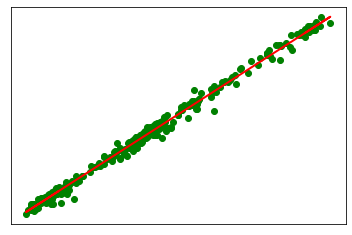

In [ ]:
# Plot outputs
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='red', linewidth=2)
plt.xticks(())
plt.yticks(())
plt.show()

### Métricas de precisión

In [ ]:
# Compute performance metrics
print("\n***Métircas de precisión***")
print("\nLinear regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))


***Métircas de precisión***

Linear regressor performance:
Mean absolute error = 0.32
Mean squared error = 0.18
Median absolute error = 0.26
Explain variance score = 0.99
R2 score = 0.99


### Guardar el modelo para futuras predicciones

In [ ]:
# Model persistence
output_model_file = 'model.pkl'

In [ ]:
# Save the model
with open(output_model_file, 'wb') as f:
    pickle.dump(regressor, f)

In [ ]:
# Load the model
with open(output_model_file, 'rb') as f:
    regressor_model = pickle.load(f)


### Predicción con el modelo guardado

In [ ]:
X_test.shape

(313, 1)

In [ ]:
# Perform prediction on test data
y_test_pred_new = regressor_model.predict(X_test)
print('\nA partir de precio Close:',X_test[0],'la predicción de precio stock Open es de:',y_test_pred_new[0])

print("\nNew mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))



A partir de precio Close: [40.612] la predicción de precio stock Open es de: [40.55189212]

New mean absolute error = 0.32


# SVM REGRESSOR

In [ ]:
# Se realiza el SVM Regressor con el mismo dataset anterior para
# evidenciar las diferencias entre ambas técnicas

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle

In [ ]:
sv_regressor = SVR(kernel='linear', C=1.0, epsilon=0.1)

In [ ]:
# Train Support Vector Regressor
sv_regressor.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(kernel='linear')

In [ ]:
# Evaluate performance of Support Vector Regressor
y_test_pred = sv_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
evs = explained_variance_score(y_test, y_test_pred)
print("\n#### Performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))


#### Performance ####
Mean squared error = 0.18
Explained variance score = 0.99


In [ ]:
# Test the regressor on test datapoint
test_data = [40.612]
print('\nA partir de precio Close:',X_test[0],'la predicción de precio stock Open es de:',y_test_pred_new[0])



A partir de precio Close: [40.612] la predicción de precio stock Open es de: [40.55189212]


# Conclusiones

1. Se determina que SVM Classifier es una tecnica de predicción para tareas de clasificación que logra predección con escasa precisión una variable target, además que el costo computacional de la creación de un classifier es alto si no se normaliza los datos.

2. Se concluye que la utlización de un encoder es necesario para el proceso de SVM Classifier, puesto que permite transformar variables categóricas a numéricas. Adicionalmente, se debe decodificar estas variables para demostrar la efectividad de la predicción.

1. Se concluye que para predicciones numéricas, tanto la técnica de Regresión lineal simple y SVM Regressor efectúan un eficiente desempeño e identico lo cual se evidencia en las métricas de precisión y en la predicción con el mismo dato de prueba.

# Bibliografía

1. Polynomial Regression in Python using scikit-learn (with example). (2021, November 16). Data36. https://data36.com/polynomial-regression-python-scikit-learn/

1. Find Open Datasets and Machine Learning Projects | Kaggle. (2022). Kaggle.com. https://www.kaggle.com/datasets?tags=13404-Logistic+Regression

1. 1.4. Support Vector Machines. (2022). Scikit-Learn. https://scikit-learn.org/stable/modules/svm.html

